IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import spacy
import joblib
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
df = pd.read_csv('/content/Ecommerce_data.csv')
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [ ]:
print("Shape:",df.shape)
df.label.value_counts()

Shape: (24000, 2)


Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

PREPROCESSING TEXT

In [ ]:
Le= LabelEncoder()
df['label']=Le.fit_transform(df['label'])

In [ ]:
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,3
1,"Contrast living Wooden Decorative Box,Painted ...",3
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,1
4,Indira Designer Women's Art Mysore Silk Saree ...,1


In [ ]:
nlp = spacy.load("en_core_web_sm")
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [ ]:
df['Text']= df['Text'].apply(preprocess)

In [ ]:
df.head()

,Text,label
0,Urban Ladder Eisner low Study Office Computer ...,3
1,contrast live Wooden Decorative Box Painted Bo...,3
2,IO Crest SY PCI40010 PCI raid Host Controller ...,2
3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...,1
4,Indira Designer Women Art Mysore Silk Saree Bl...,1


SPLITTING INTO TRAIN AND TEST

In [ ]:
X= df['Text']
y=df['label']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=17,stratify=df.label)

MULTINOMIAL NAIVE BAYES CLASSIFIER

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.97      0.97      0.97      1200
           3       0.91      0.97      0.94      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



<Axes: >

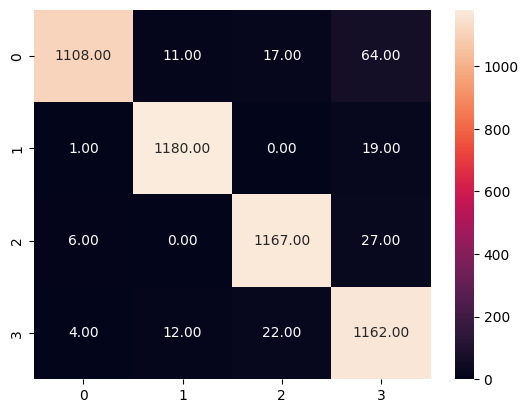

In [ ]:
NBclassifier = Pipeline([('tfidfvectorizer',TfidfVectorizer()),('MultinomialNaiveBayes',MultinomialNB())])
NBclassifier.fit(X_train,y_train)
y_pred= NBclassifier.predict(X_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f')

K-NEAREST NEIGHBORS CLASSIFIER

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.97      0.98      0.97      1200
           3       0.95      0.96      0.95      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



<Axes: >

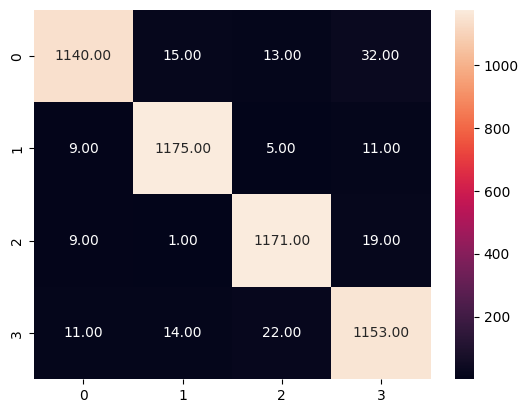

In [ ]:
KNNclassifier = Pipeline([('tfidfvectorizer',TfidfVectorizer()),('Knearest_neighbors',KNeighborsClassifier())])
KNNclassifier.fit(X_train,y_train)
y_pred= KNNclassifier.predict(X_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f')

SUPPORT VECTOR CLASSIFIER

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1200
           1       0.99      0.99      0.99      1200
           2       0.98      0.98      0.98      1200
           3       0.97      0.98      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



<Axes: >

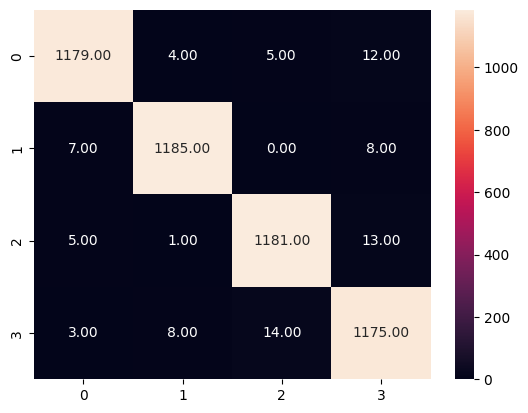

In [ ]:
SVClassifier = Pipeline([('tfidfvectorizer',TfidfVectorizer()),('SupportVector_Classifier',SVC(kernel='rbf'))])
SVClassifier.fit(X_train,y_train)
y_pred= SVClassifier.predict(X_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f')

RANDOM FOREST CLASSIFIER

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1200
           1       0.98      0.99      0.98      1200
           2       0.98      0.98      0.98      1200
           3       0.97      0.97      0.97      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



<Axes: >

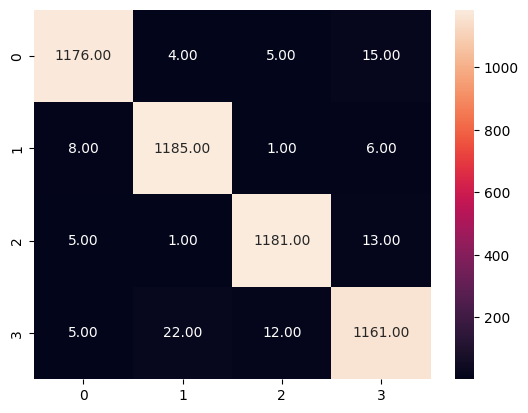

In [ ]:
RFClassifier = Pipeline([('tfidfvectorizer',TfidfVectorizer()),('RandomForest',RandomForestClassifier())])
RFClassifier.fit(X_train,y_train)
y_pred= RFClassifier.predict(X_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f')

PREDICTION

In [ ]:
new_text ='application of electrical circuits, components, and systems, encompassing a wide range of devices from microprocessors and integrated circuits to electronic gadgets and communication systems'

In [ ]:
preprocessed_text = preprocess(new_text)
predicted_label = SVClassifier.predict([preprocessed_text])[0]
label_map = {0: 'Household', 1: 'Books', 2: 'Electronics', 3: 'Clothing & Accessories'}
predicted_label_name = label_map[predicted_label]
print("Predicted label:", predicted_label_name)

Predicted label: Electronics


In [ ]:
joblib.dump(SVClassifier, 'E-Commercetextclassifier.joblib')

['E-Commercetextclassifier.joblib']